<img src=".\images\Logo.png" width=150 align="left" /> <img src=".\images\Logo2.jpg" width=450 align="right" />


# <center><font color= #1e8449 > <b>CU18_Infraestructuras_eventos</font></center>

<font color='steelblue'><b>Citizenlab Data Science Methodology > II - Data Processing Domain </font>
***
> # <font color='steelblue'> <b>11.- ECA - Exploratory Causal Analysis</font>

<font color='steelblue'>Exploratory causal analysis (ECA) is the process of discovering the root causes of problems in order to identify appropriate solutions.</font>

## <font color='steelblue'>Tasks</font>

<font color='steelblue'><b>Define the key challenge or setback</b>
    
<font color='steelblue'><b>Determine the causes and effects of the key challenge</b>
    
<font color='steelblue'><b>Use a diagram or graph to organize information</b>
    
<font color='steelblue'><b>Formulate a response to the primary causes of your challenge</b>
    
<font color='steelblue'><b>Review your process and address new causes and effects</b>



## <font color='green'>File</font>

- <font color='steelblue'> <b>Input File: CU_53_09.2_02_spi</font>
- <font color='steelblue'> <b>Output File: No aplica</font>

### Encoding

Con la siguiente expresión se evitan problemas con el encoding al ejecutar el notebook. Es posible que deba ser eliminada o adaptada a la máquina en la que se ejecute el código.

In [1]:
Sys.setlocale(category = "LC_ALL", locale = "es_ES.UTF-8")

[1] "LC_CTYPE=es_ES.UTF-8;LC_NUMERIC=C;LC_TIME=es_ES.UTF-8;LC_COLLATE=es_ES.UTF-8;LC_MONETARY=es_ES.UTF-8;LC_MESSAGES=en_US.UTF-8;LC_PAPER=es_ES.UTF-8;LC_NAME=C;LC_ADDRESS=C;LC_TELEPHONE=C;LC_MEASUREMENT=es_ES.UTF-8;LC_IDENTIFICATION=C"

## <font color='green'>Settings</font>

### Libraries to use

In [15]:
library(readr)
library(dplyr)
# library(sf)
library(tidyr)
library(stringr)
library(ggplot2)

### Paths

In [3]:
iPath <- "Data/Input/"
oPath <- "Data/Output/"

## <font color='green'>Data Load</font>

<font color='tomato'><b> OPCION A:</b> Seleccionar fichero en ventana para mayor comodidad</font> 

Data load using the {tcltk} package. Ucomment the line if using this option

In [4]:
# file_data <- tcltk::tk_choose.files(multi = FALSE)

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>



In [4]:
iFile <- "CU_53_09.2_02_spi.csv"
file_data <- paste0(iPath, iFile)

if(file.exists(file_data)){
    cat("Se leerán datos del archivo: ", file_data)
} else{
    warning("Cuidado: el archivo no existe.")
}


Se leerán datos del archivo:  Data/Input/CU_53_09.2_02_spi.csv

#### Data file to dataframe

Usar la función adecuada según el formato de entrada (xlsx, csv, json, ...)

In [5]:
data <- read_csv(file_data)


Rows: 2028 Columns: 18
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
dbl (17): rank_score_spi, score_spi, score_bhn, score_fow, score_opp, score_...
lgl  (1): is_train

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


<font color='tomato'>Visualizo los datos.</font>

Estructura de  los datos:

In [6]:
data |> glimpse()

Rows: 2,028
Columns: 18
$ rank_score_spi <dbl> 80, 97, 46, 84, 99, 150, 74, 105, 36, 143, 154, 69, 168…
$ score_spi      <dbl> 67.59, 60.10, 73.96, 62.86, 61.43, 45.57, 66.56, 59.45,…
$ score_bhn      <dbl> 79.16, 74.55, 81.88, 79.45, 77.84, 47.15, 80.41, 66.16,…
$ score_fow      <dbl> 65.40, 51.25, 70.69, 61.22, 57.63, 45.21, 62.82, 54.62,…
$ score_opp      <dbl> 58.22, 54.49, 69.32, 47.92, 48.83, 44.34, 56.46, 57.56,…
$ score_nbmc     <dbl> 86.67, 72.88, 86.33, 83.91, 87.72, 54.66, 92.38, 72.21,…
$ score_ws       <dbl> 86.44, 83.35, 88.07, 77.71, 78.15, 47.82, 78.47, 66.32,…
$ score_sh       <dbl> 87.69, 77.17, 89.59, 85.11, 86.61, 36.59, 85.21, 75.91,…
$ score_ps       <dbl> 55.85, 64.81, 63.55, 71.08, 58.87, 49.53, 65.57, 50.21,…
$ score_abk      <dbl> 74.20, 47.04, 89.07, 65.15, 55.79, 50.36, 81.61, 68.71,…
$ score_aic      <dbl> 74.19, 37.15, 68.14, 51.25, 78.17, 33.84, 61.95, 56.61,…
$ score_hw       <dbl> 53.55, 64.58, 61.41, 62.00, 45.35, 36.99, 61.64, 41.87,…
$ score_eq      

Muestra de los primeros datos:

In [7]:
data |> slice_head(n = 5)

rank_score_spi,score_spi,score_bhn,score_fow,score_opp,score_nbmc,score_ws,score_sh,score_ps,score_abk,score_aic,score_hw,score_eq,score_pr,score_pfc,score_incl,score_aae,is_train
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>
80,67.59,79.16,65.40,58.22,86.67,86.44,87.69,55.85,74.20,74.19,53.55,59.66,81.60,60.29,40.24,50.73,TRUE
97,60.10,74.55,51.25,54.49,72.88,83.35,77.17,64.81,47.04,37.15,64.58,56.22,71.05,64.77,56.12,26.03,TRUE
46,73.96,81.88,70.69,69.32,86.33,88.07,89.59,63.55,89.07,68.14,61.41,64.13,90.28,67.65,68.48,50.87,TRUE
84,62.86,79.45,61.22,47.92,83.91,77.71,85.11,71.08,65.15,51.25,62.00,66.47,61.56,56.51,48.70,24.90,TRUE
99,61.43,77.84,57.63,48.83,87.72,78.15,86.61,58.87,55.79,78.17,45.35,51.22,60.41,58.62,35.57,40.72,TRUE


##  Exploratory causal analysis

**REFERENCE**
https://bookdown.org/paul/applied-causal-analysis/

<font color='tomato'>Select columns</font>

In [16]:
# Seleccionamos las variables a analizar. 
cols <- names(data[, -1])

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


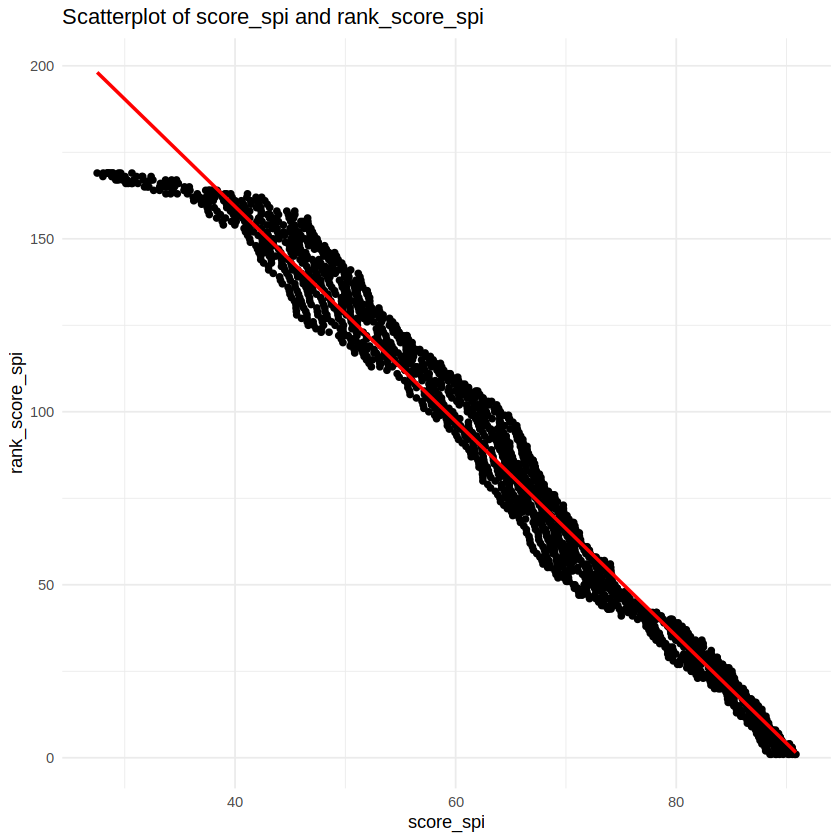

`geom_smooth()` using formula = 'y ~ x'


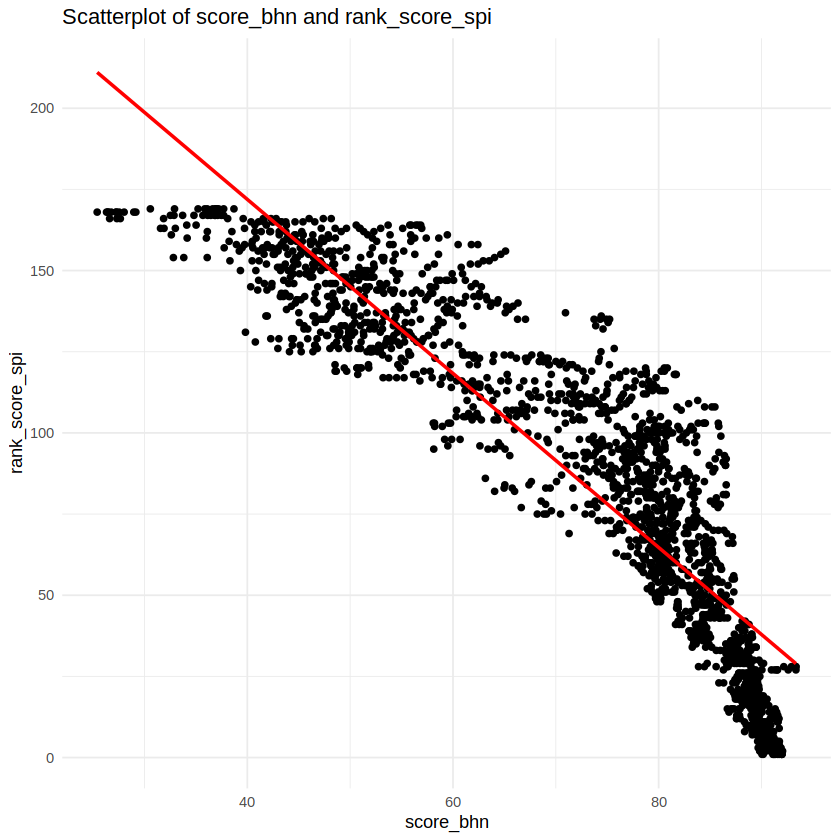

`geom_smooth()` using formula = 'y ~ x'


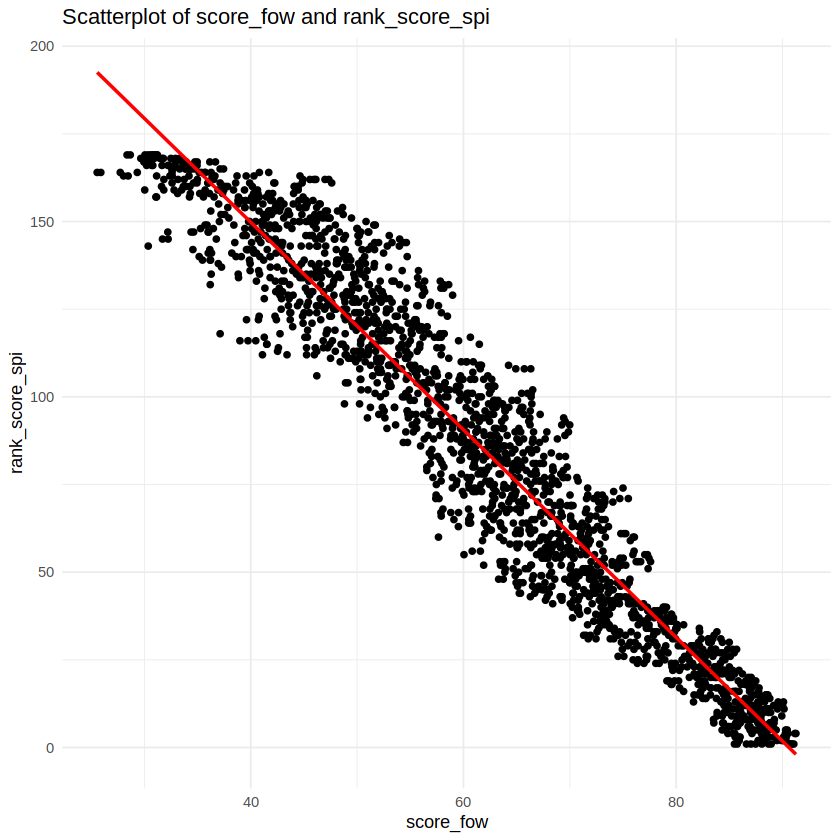

`geom_smooth()` using formula = 'y ~ x'


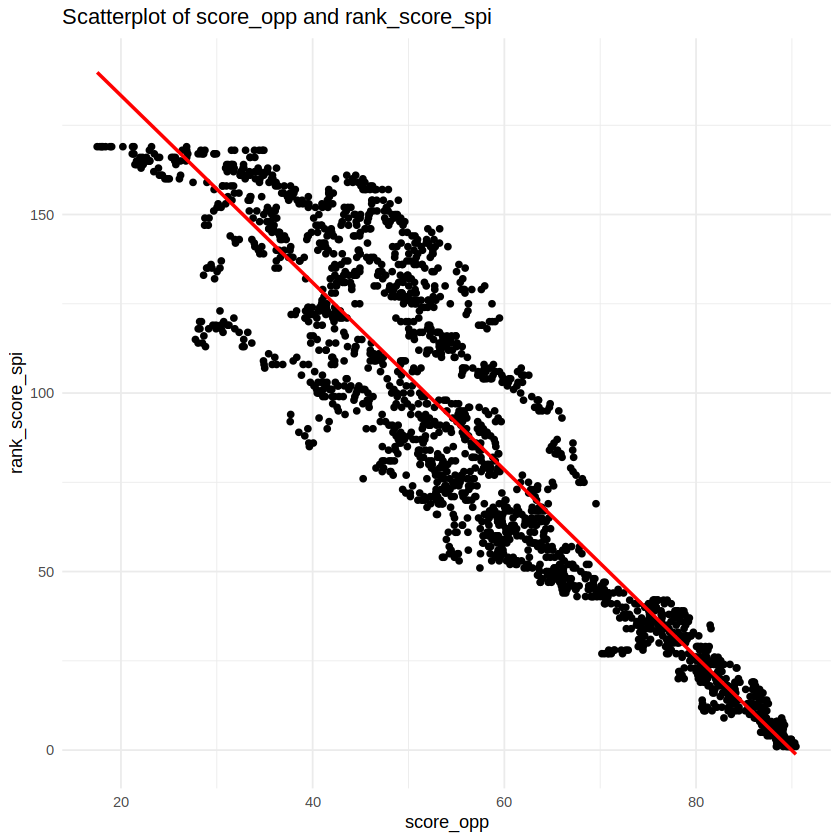

`geom_smooth()` using formula = 'y ~ x'


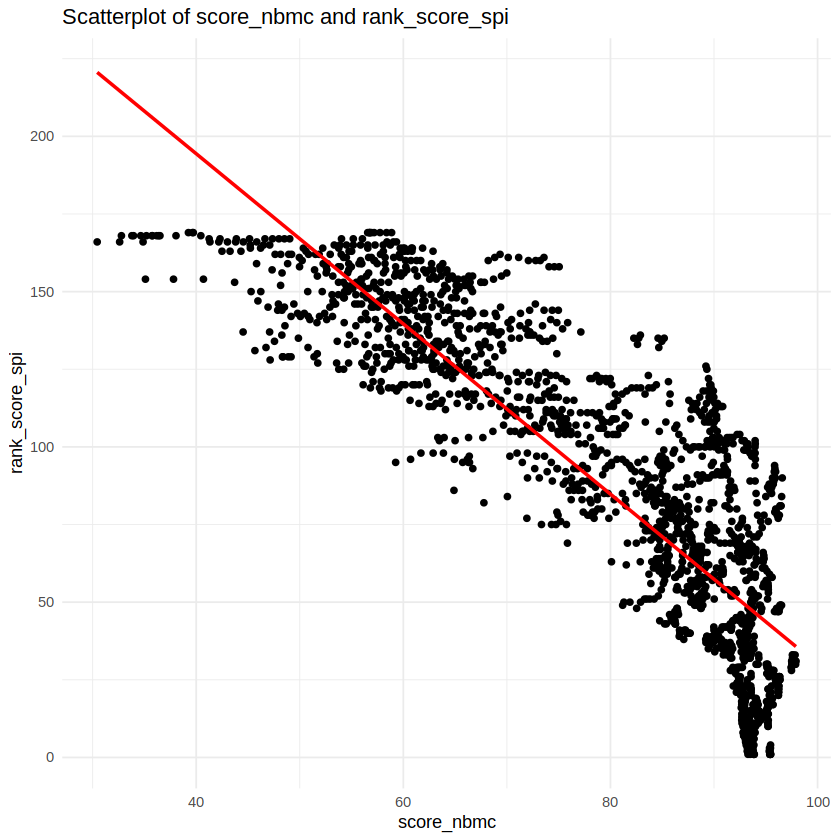

`geom_smooth()` using formula = 'y ~ x'


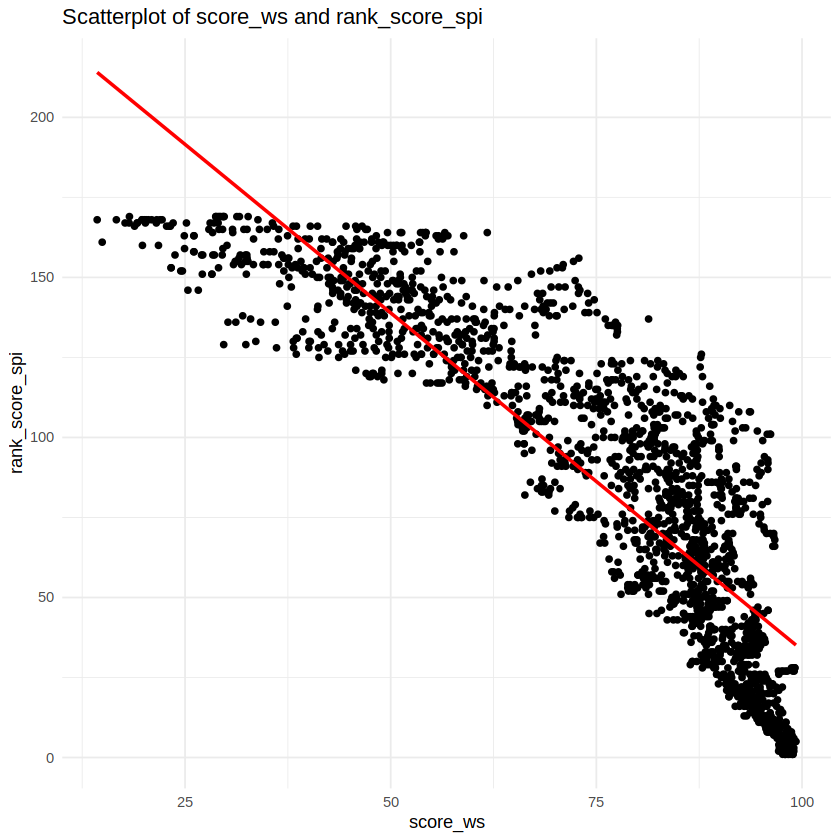

`geom_smooth()` using formula = 'y ~ x'


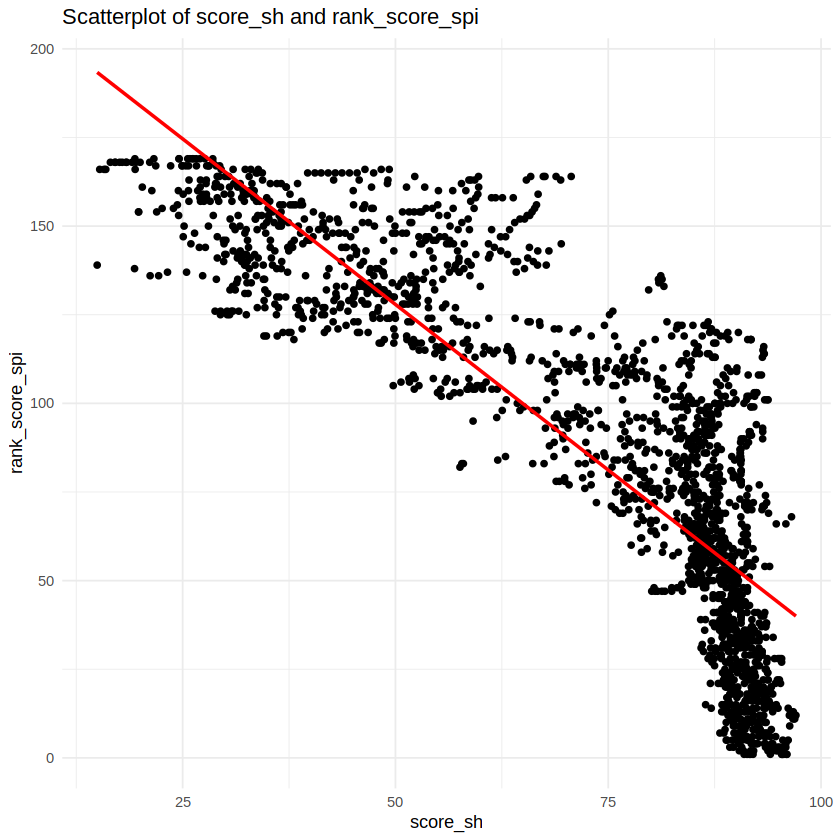

`geom_smooth()` using formula = 'y ~ x'


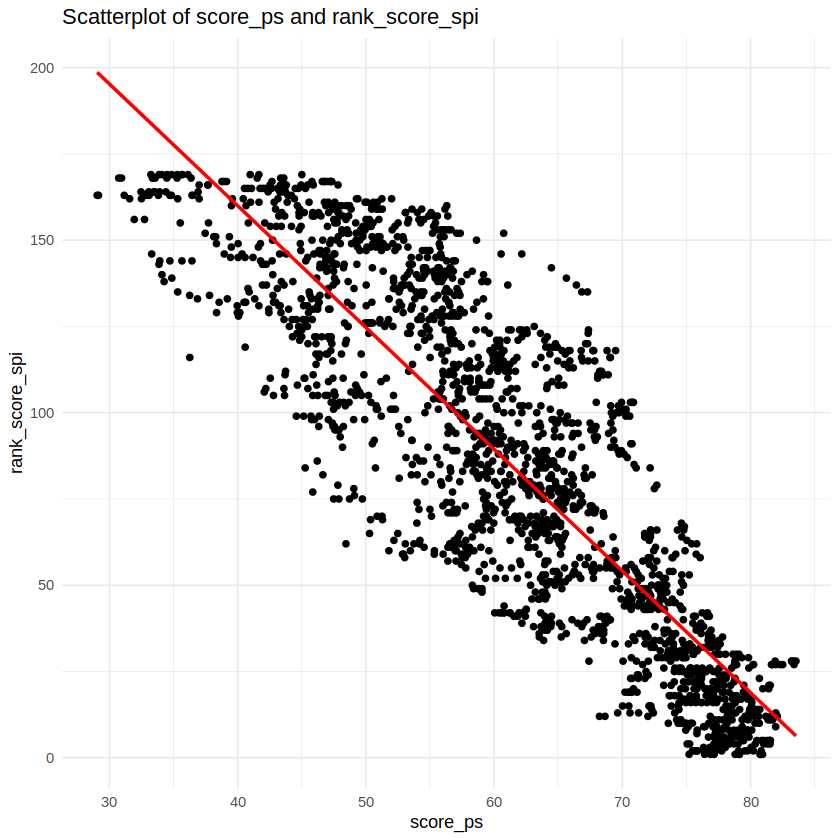

`geom_smooth()` using formula = 'y ~ x'


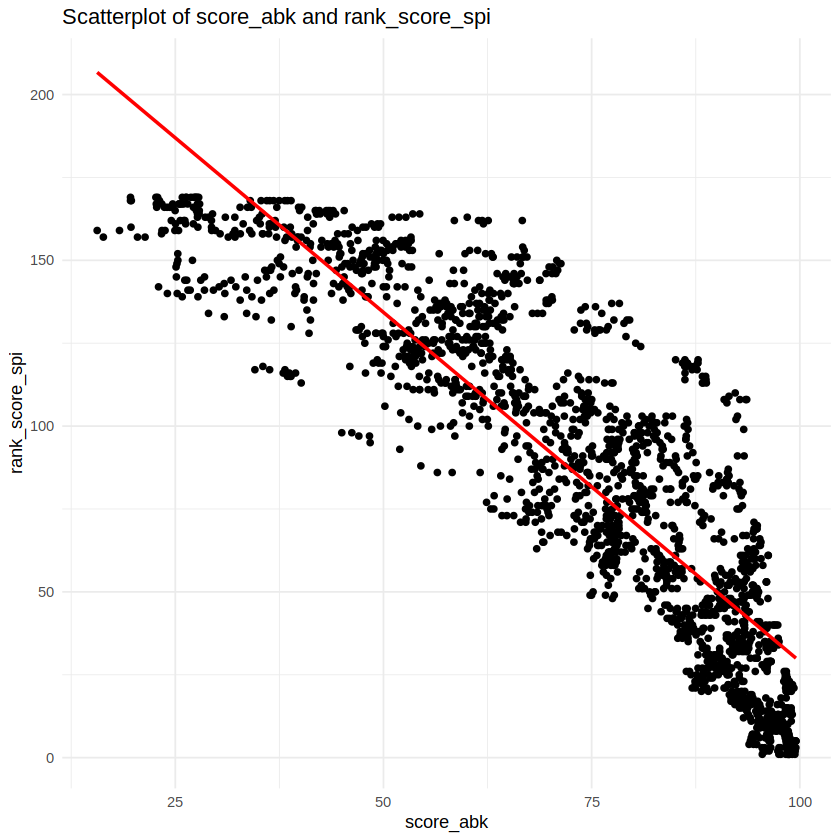

`geom_smooth()` using formula = 'y ~ x'


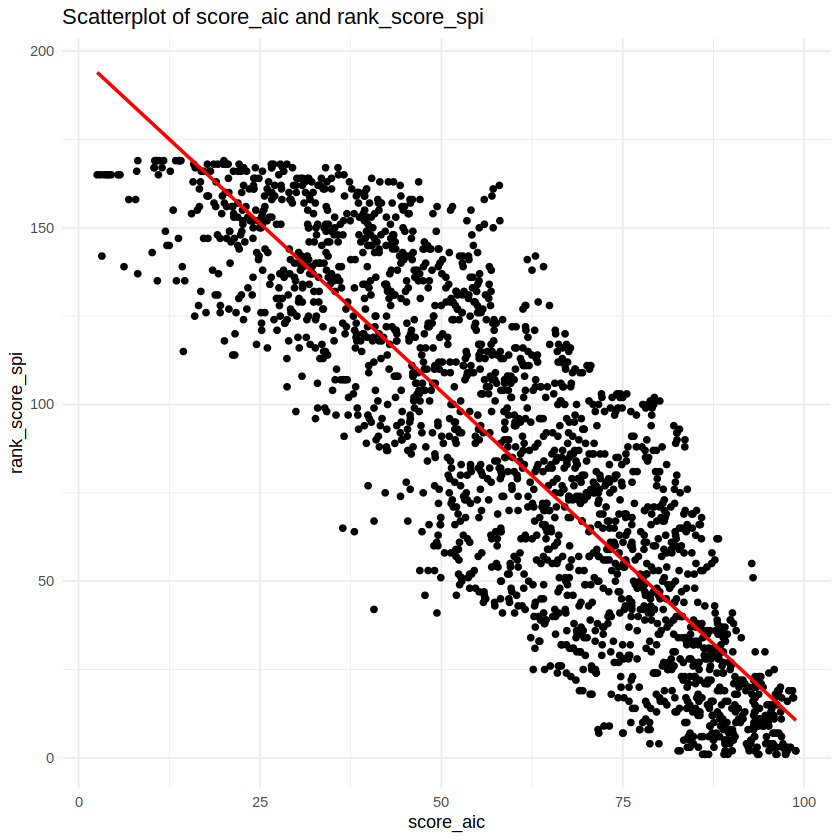

`geom_smooth()` using formula = 'y ~ x'


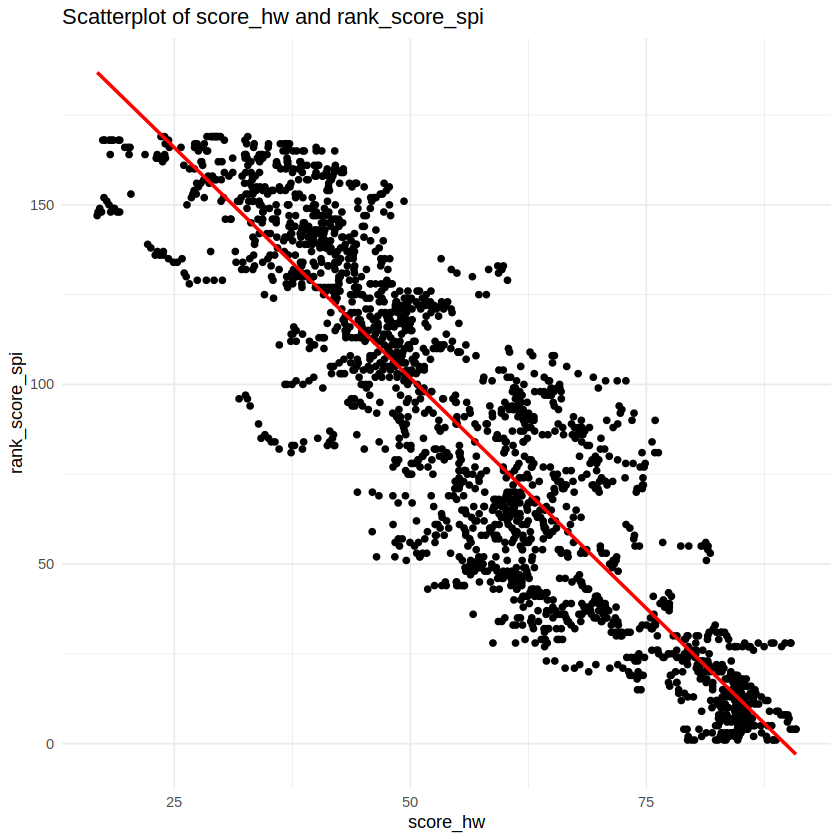

`geom_smooth()` using formula = 'y ~ x'


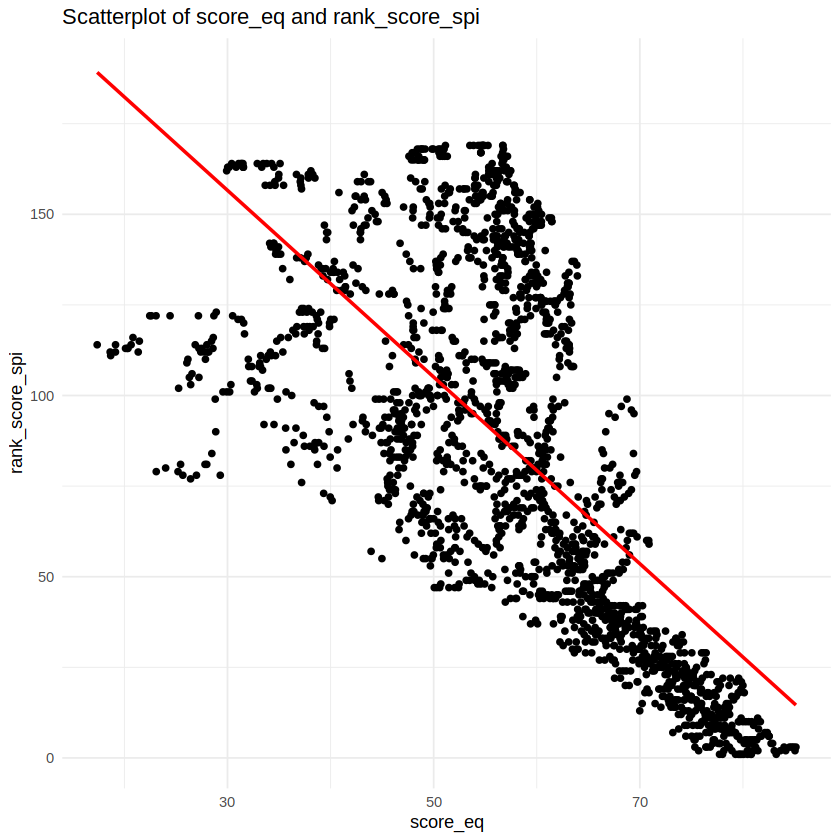

`geom_smooth()` using formula = 'y ~ x'


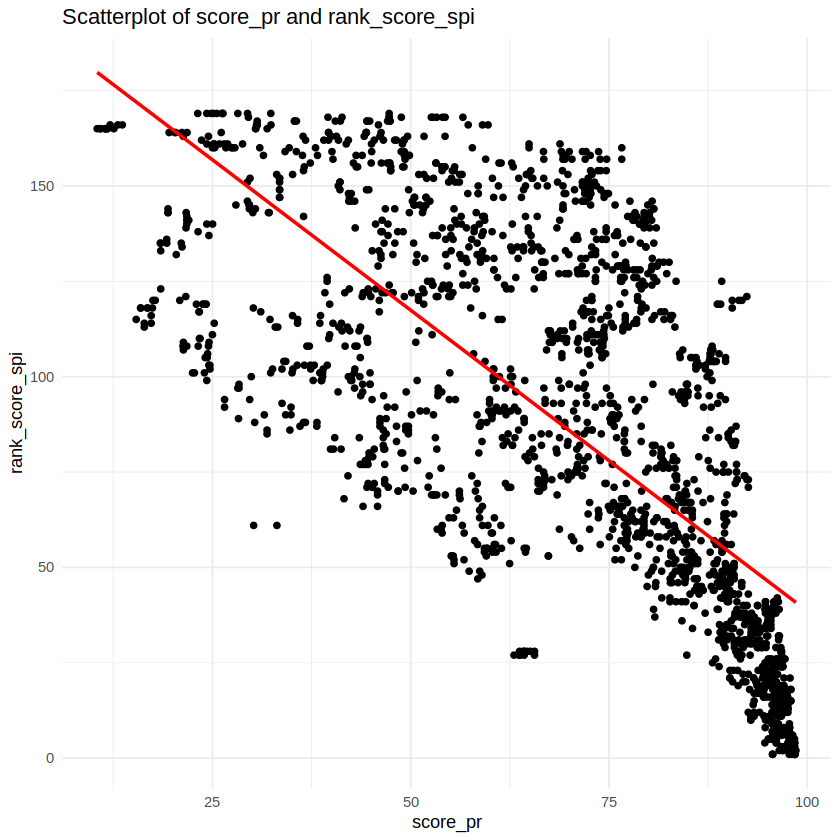

`geom_smooth()` using formula = 'y ~ x'


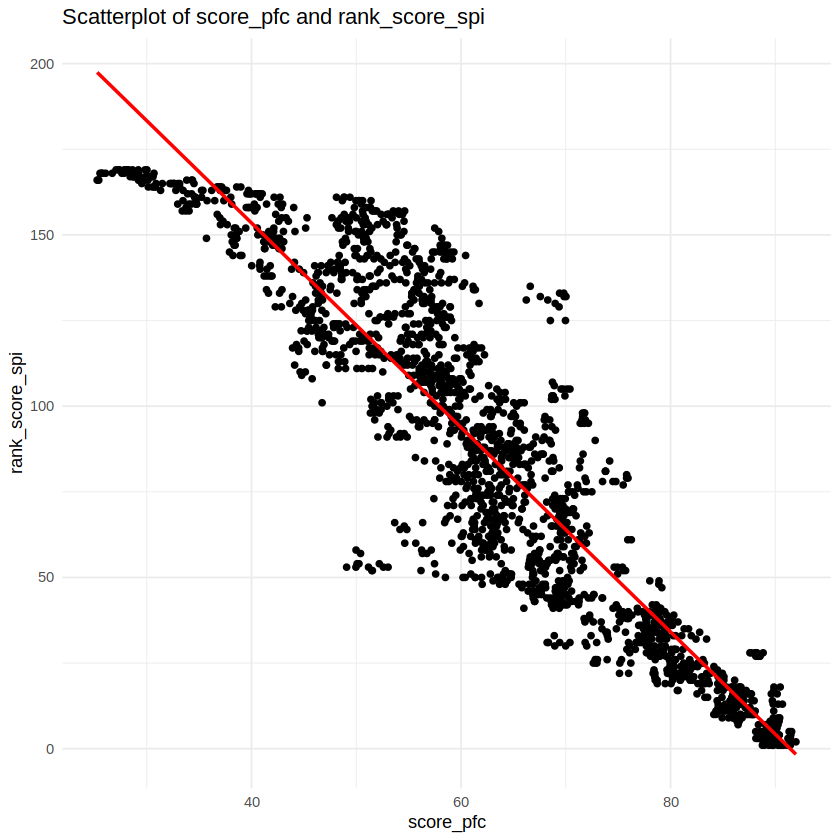

`geom_smooth()` using formula = 'y ~ x'


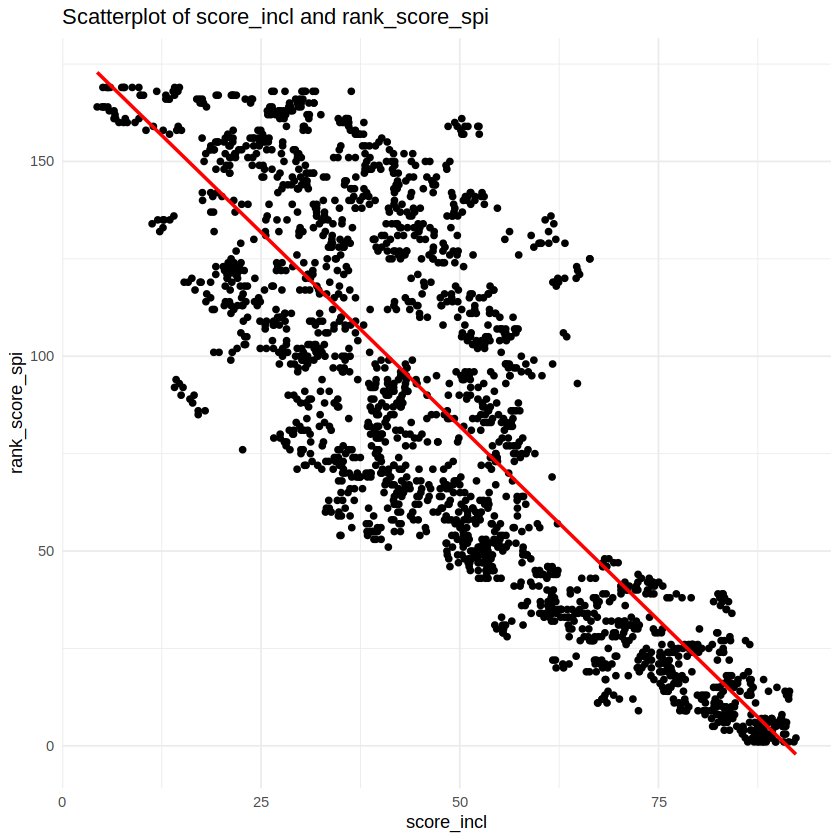

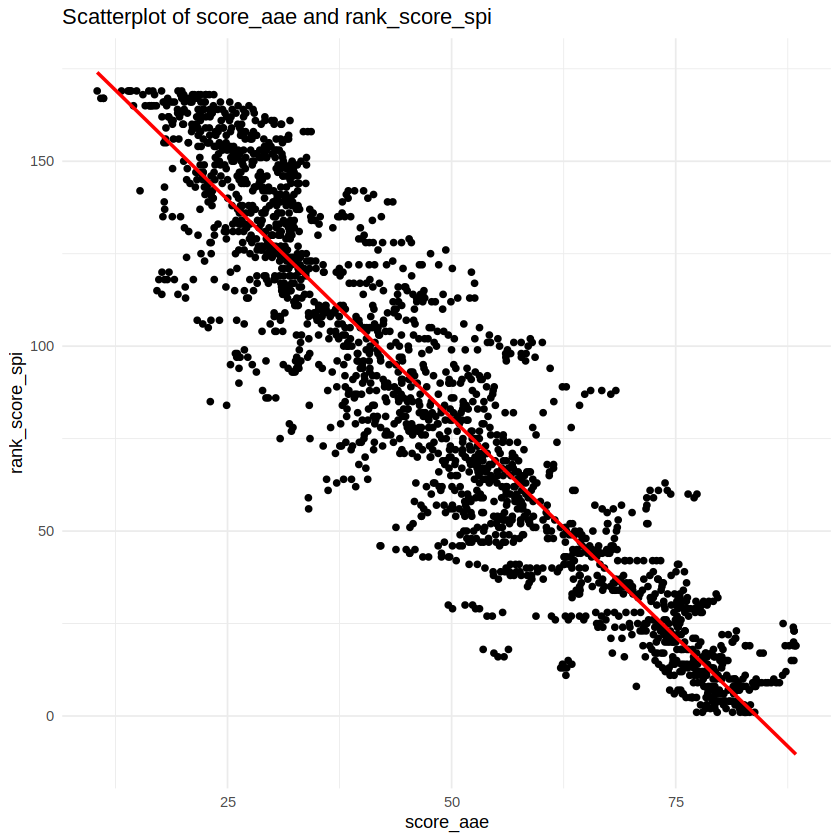

In [17]:
# Create scatterplots
for (col in cols) {
  if (is.numeric(data[[col]])) {
    p <- ggplot(data, aes_string(x = col, y = 'rank_score_spi')) +
      geom_point() +
      geom_smooth(method = "lm", se = FALSE, color = "red") +
      theme_minimal() +
      ggtitle(paste("Scatterplot of", col, "and rank_score_spi"))
    print(p)
  }
}

## <font color='green'>Data Save</font>

* Solo si se han hecho cambios

* No aplica

<font color='tomato'> Identificamos los datos a guardar</font>

In [18]:
data_to_save <- data


<font color='tomato'>Estructura de nombre de archivos:</font>

* Código del caso de uso, por ejemplo "CU_04"
* Número del proceso que lo genera, por ejemplo "_06".
* Resto del nombre del archivo de entrada
* Extensión del archivo

Ejemplo: "CU_04_06_01_01_zonasgeo.json, primer fichero que se genera en la tarea 01 del proceso 05 (Data Collection) para el caso de uso 04 (vacunas) y que se ha transformado en el proceso 06

Importante mantener los guiones bajos antes de proceso, tarea, archivo y nombre

### Proceso 11

In [19]:
caso <- "CU_53"
proceso <- '_11'
tarea <- "_02"
archivo <- ""
proper <- "_spi"
extension <- ".csv"

<font color='tomato'><b> OPCION A:</b> Uso del paquete "tcltk" para mayor comodidad</font>

* Buscar carpeta, escribir nombre de archivo SIN extensión (se especifica en el código)
* Especificar sufijo2 si es necesario
* Cambiar datos por datos_xx si es necesario

In [20]:
# file_save <- paste0(caso, proceso, tarea, tcltk::tkgetSaveFile(), proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

<font color='tomato'><b> OPCION B:</b> Especificar el nombre de archivo</font>

- Los ficheros de salida del proceso van siempre a Data/Output/.  

In [21]:
# file_save <- paste0(caso, proceso, tarea, archivo, proper, extension) 
# path_out <- paste0(oPath, file_save)
# write_csv(data_to_save_xxxxx, path_out)

# cat('File saved as: ')
# path_out

#### Copia del fichero a Input

Si el archivo se va a usar en otros notebooks, copiar a la carpeta Input

In [22]:
# path_in <- paste0(iPath, file_save)
# file.copy(path_out, path_in, overwrite = TRUE)

## <font color='#2874a6'>REPORT</font>

A continuación se realizará un informe de las acciones realizadas

## <font color=' #2874a6 '>Main Actions Carried Out</font>

- Al no haber target no se realiza análisis causal

## <font color=' #2874a6 '>Main Conclusions</font>

- Los datos son adecuados para los modelos que se preveen


## <font color='RED'>CODE TO DEPLOY (PILOT)</font>

A continuación se incluirá el código que deba ser llevado a despliegue para producción, dado que se entiende efectúa operaciones necesarias sobre los datos en la ejecución del prototipo

<font color=' red '><b>Description</b></font>

- No hay nada que desplegar en el piloto, ya que estos datos son estáticos o en todo caso cambian con muy poca frecuencia, altamente improbable durante el proyecto.


<font color=' red '><b>CODE</b></font>